In [1]:
# 聲明在畫圖時需要的環境，有助於進行繪圖
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine.data.shape

(178, 13)

In [15]:
#導入分訓練集測試集模塊
from sklearn.model_selection import train_test_split

In [16]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [17]:
Tree_clf = DecisionTreeClassifier(random_state=0)
#不指定random_state的話每次運行的結果會不一樣

In [18]:
RF_clf = RandomForestClassifier(random_state=0)

In [19]:
Tree_clf = Tree_clf.fit(Xtrain,Ytrain)
RF_clf = RF_clf.fit(Xtrain,Ytrain)

score_of_Tree = Tree_clf.score(Xtest,Ytest)
score_of_Forest = RF_clf.score(Xtest,Ytest)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
print("Single Tree score:",score_of_Tree,"Forest score:",score_of_Forest)

Single Tree score: 0.9074074074074074 Forest score: 0.9814814814814815


In [23]:
#進行交叉驗證
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

RF_clf = RandomForestClassifier(n_estimators=25)
RF_score = cross_val_score(RF_clf,wine.data,wine.target,cv=10)

tree_clf = DecisionTreeClassifier()
tree_score = cross_val_score(tree_clf,wine.data,wine.target,cv=10)

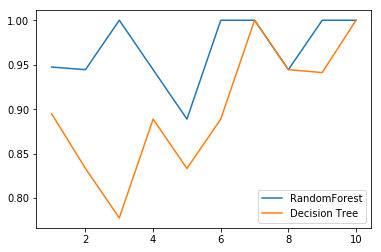

In [25]:
plt.plot(range(1,11),RF_score,label="RandomForest")
plt.plot(range(1,11),tree_score,label="Decision Tree")
plt.legend()
plt.show()

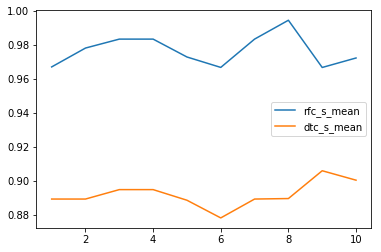

In [41]:
#進行100次交叉驗證 每10次取一平均
rfc_l = []
dtc_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    score = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(score)
    dtc = DecisionTreeClassifier()
    score_dt = cross_val_score(dtc,wine.data,wine.target,cv=10).mean()
    dtc_l.append(score_dt)
else:
    plt.plot(range(1,11),rfc_l,label = "rfc_s_mean")
    plt.plot(range(1,11),dtc_l,label = "dtc_s_mean")
    plt.legend()
    plt.show()

0.9888888888888889 19


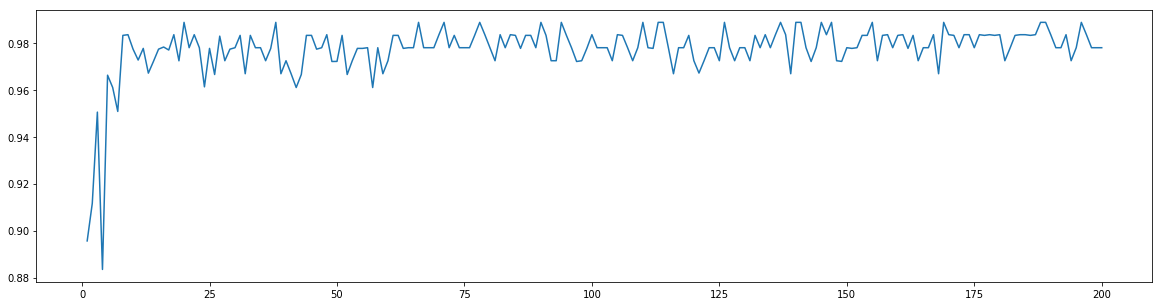

In [28]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [42]:
rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(Xtrain,Ytrain)

In [45]:
#查看隨機森林每棵樹的構建的情況 estimators_
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

In [47]:
#oob_score為True時會使用袋外數據進行測試
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc.fit(wine.data,wine.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
# 調用oob_score_屬性來查看使用袋外數據測試的結果
rfc.oob_score_

0.9887640449438202

In [50]:
rfc.predict(Xtest)

array([1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 0, 0, 0, 1, 0, 2])

In [51]:
rfc.score(Xtest,Ytest)

1.0

In [55]:
import pandas as pd
pd.concat([pd.DataFrame(rfc.feature_importances_),pd.DataFrame(wine.feature_names)],axis=1)

,0,0
0,0.079367,alcohol
1,0.041186,malic_acid
2,0.014064,ash
3,0.023898,alcalinity_of_ash
4,0.037705,magnesium
5,0.050696,total_phenols
6,0.147214,flavanoids
7,0.006333,nonflavanoid_phenols
8,0.029613,proanthocyanins
9,0.186948,color_intensity


In [56]:
#返回每一個測試集樣本被分到該標籤的概率
rfc.predict_proba(Xtest)

array([[0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.2 , 0.8 , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.8 , 0.2 ],
       [0.  , 0.  , 1.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.88, 0.04, 0.08],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.08, 0.92],
       [0.04, 0.  , 0.96],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.12, 0.84, 0.04],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 0.88, 0.12],
       [0.04, 0.96, 0.  ],
       [0.08, 0.92, 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.96, 0.  , 0.04],
 